In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from utils.hopkins_statistics import hopkins_statistic

In [4]:
# Read the original df
df_preprocessed = df = pd.read_csv('../data/preprocessed_data.csv')

# Read the cleaned df
df_cleaned = df = pd.read_csv('../data/cleaned_data.csv')
df = pd.read_csv('../data/pca_one_hot_encode_data.csv')

In [5]:
print(df_cleaned.shape)
print(df.shape)

(3900, 103)
(3900, 75)


In [6]:
# Calculate Hopkins statistic
X = df.values

hopkins_stat = hopkins_statistic(X, sample_size=0.05)
print(f'Hopkins Statistic: {hopkins_stat}')

Hopkins Statistic: 7.506843764735e-09


For n_clusters = 2, the average silhouette_score is : 0.21151061332347526
For n_clusters = 3, the average silhouette_score is : 0.14848110533803632
For n_clusters = 4, the average silhouette_score is : 0.08431864202802009
For n_clusters = 5, the average silhouette_score is : 0.07176505584516953
For n_clusters = 6, the average silhouette_score is : 0.062045274808190984
For n_clusters = 7, the average silhouette_score is : 0.05483873398906525
For n_clusters = 8, the average silhouette_score is : 0.054351896347578
For n_clusters = 9, the average silhouette_score is : 0.054842220350953146
For n_clusters = 10, the average silhouette_score is : 0.048128343152964326


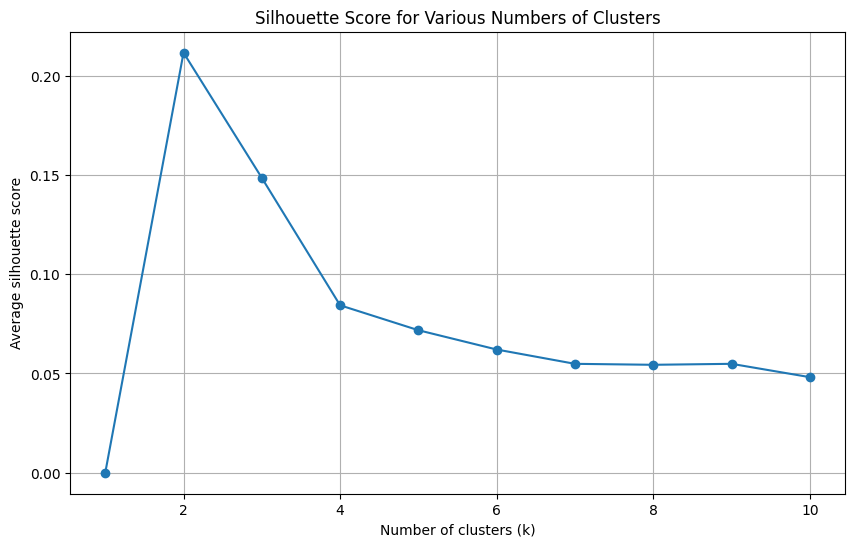

In [7]:
# Range of number of clusters to try
range_n_clusters = range(1, 11)  # from 1 to 10 clusters

# List to hold silhouette scores
silhouette_avg_list = []

# Calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    if n_clusters == 1:
        silhouette_avg_list.append(0)
        continue
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.grid(True)
plt.show()

Silhouette Score: 0.21151061332347526


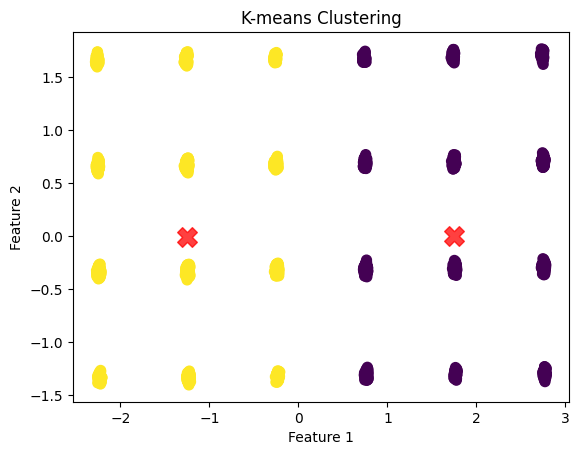

In [8]:
# KMeans clustering

# Convert the dataframe into a numpy array
X = df.values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# Write centroids to a file for future classification
centroids = pd.DataFrame(centers)
centroids.to_csv('../results/classification/centroids.csv', index=False)

In [9]:
# add the cluster labels to the cleaned dataframe
df_cleaned['cluster'] = y_pred

In [15]:
df_cleaned.to_csv('../data/cleaned_data_cluster.csv', index=False)

In [9]:
# add the cluster labels to the original dataframe
df_preprocessed['cluster'] = y_pred

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases,cluster
0,55,Male,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly,0
1,19,Male,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly,0
2,50,Male,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly,0
3,21,Male,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly,0
4,45,Male,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,32,Venmo,Weekly,0
3896,52,Female,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,41,Bank Transfer,Bi-Weekly,0
3897,46,Female,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,24,Venmo,Quarterly,1
3898,44,Female,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,24,Venmo,Weekly,0


In [ ]:
df_preprocessed.to_csv('../data/preprocessed_data_cluster.csv', index=False)